<div id=5 style="color:white;
           display:fill;
           border-radius:10px;
           background-color:#3EC70B;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
           justify-content:center;
           border-width: 0.25rem;
           border-style: solid;
           border-color: #256D85">

<h1 style="padding: 2.5rem;
          color:white;
          text-align:center;
          margin:0 auto;
          font-size:3rem;">
   🚢 Titanic Survival Prediction 
</h1>
</div>

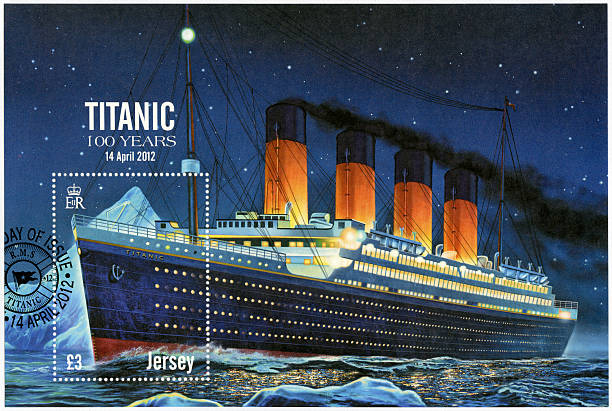

- Introduction
- Data Set
- Project Overview
- Projett Motivation
- Gatgering Data
- Exploratory Data Analysis
- Modelling
- Conclusion

## <font color ='brown'>Introduction</font>

in this project we will use  machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## <font color ='brown'>Attribute Information</font>

-  PassengerId - Passenger identifier
-  Survived - Indicates if the passenger survived the ship wreck, it is our target variable (the variable we will be predicting).
-  Pclass - Indicates the socio-economic status of the given passanger (1st = Upper, 2nd = Middle, 3rd = Lower).
-  Name - Name of the passanger
-  Sex - Male or Female.
-  Age - The age of the passenger.
-  sibsp - The number of siblings / spouses of the passanger that are on-board.
-  Parch - The number of parents /  children that are on-board.
-  Ticket - Ticket number, which is the unique identifier of each passanger.
-  Fare - How much the passanger has paid in total.
-  Cabin - The cabin number of the passanger.
-  Embarked - Which port the passanger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton).

## <font color ='brown'>Importing Libraries</font> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


## <font color ='brown'>Gathering Data</font>

In [2]:
train_df = pd.read_csv('train.csv')
df = train_df.copy()

print('Shape of data{}'.format(df.shape))
print('Number of rows:{}'.format(df.shape[0]))
print('Number of rows:{}'.format(df.shape[1]))
df.info()

Shape of data(891, 12)
Number of rows:891
Number of rows:12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Target Column is Survive.

In [4]:
# Preparing Table
a = round(df['Survived'].value_counts()/len(df['Survived']),2)
survive_ratio=  pd.DataFrame(a).T 
survive_ratio = survive_ratio.rename(columns={0:'Not Survived' , 1:'Survived1'})
survive_ratio 

,Not Survived,Survived1
Survived,0.62,0.38


In [5]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

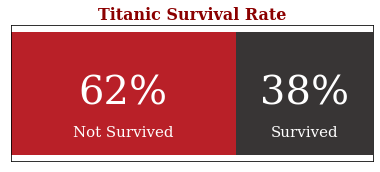

In [6]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(survive_ratio.index, survive_ratio['Not Survived'],color='#b20710', alpha=0.9, label='Male')
ax.barh(survive_ratio.index, survive_ratio['Survived1'], left=survive_ratio['Not Survived'],color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# /annotating code starts here
for i in survive_ratio.index:
    ax.annotate(f'{int(survive_ratio["Not Survived"][i]*100)}%',   xy=(survive_ratio['Not Survived'][i]/2, i), va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',color='white')
    ax.annotate('Not Survived',   xy=(survive_ratio['Not Survived'][i]/2, -0.25),va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')        
for i in survive_ratio.index:
	ax.annotate(f'{int(survive_ratio["Survived1"][i]*100)}%' ,
                xy=(survive_ratio['Not Survived'][i]+survive_ratio['Survived1'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
	ax.annotate('Survived' , xy=(survive_ratio['Not Survived'][i]+survive_ratio['Survived1'][i]/2, -0.25),
                    va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                    color='white')
plt.title('Titanic Survival Rate' , fontdict=axtitle_dict)
plt.show()

<p style='font-size:18px; font-family:'Calibri Light'; font-weight:bold;'>Observation:</p>

<p style='font-size:18px; font-family:'Calibri Light'; line-height:1.3'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;62% passengers died in titanic incident and 38% Survived.Majority of the passe
</p>

## <font color ='brown'>Missings And duplicates values</font> 

In [7]:
print(df.isna().sum().sort_values(ascending = False))
print('duplicate values in df' ,df.duplicated().sum() )
print('duplicates dropped')

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
duplicate values in df 0
duplicates dropped


<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Filtering Numericals and Categoricals columns:</p>

In [8]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<=7:
		categ_columns.append(col) 
print('categ numericals columns are {}'.format(categ_columns))

Num_cols = [col for col in df.columns if col not in categ_columns]
print('numericals columns are {}'.format(Num_cols)) 


categ numericals columns are ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numericals columns are ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']


In [9]:
df.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [10]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
categ_columns.remove('Survived')
Num_cols.remove('Name')
Num_cols.remove('Ticket')
Num_cols.remove('Cabin')
Num_cols.remove('PassengerId')

In [12]:
Num_cols

['Age', 'Fare']

## <font color ='brown'>Exploratory Data Analysis </font>

## <font color ='brown'>Unvariate Analysis</font>


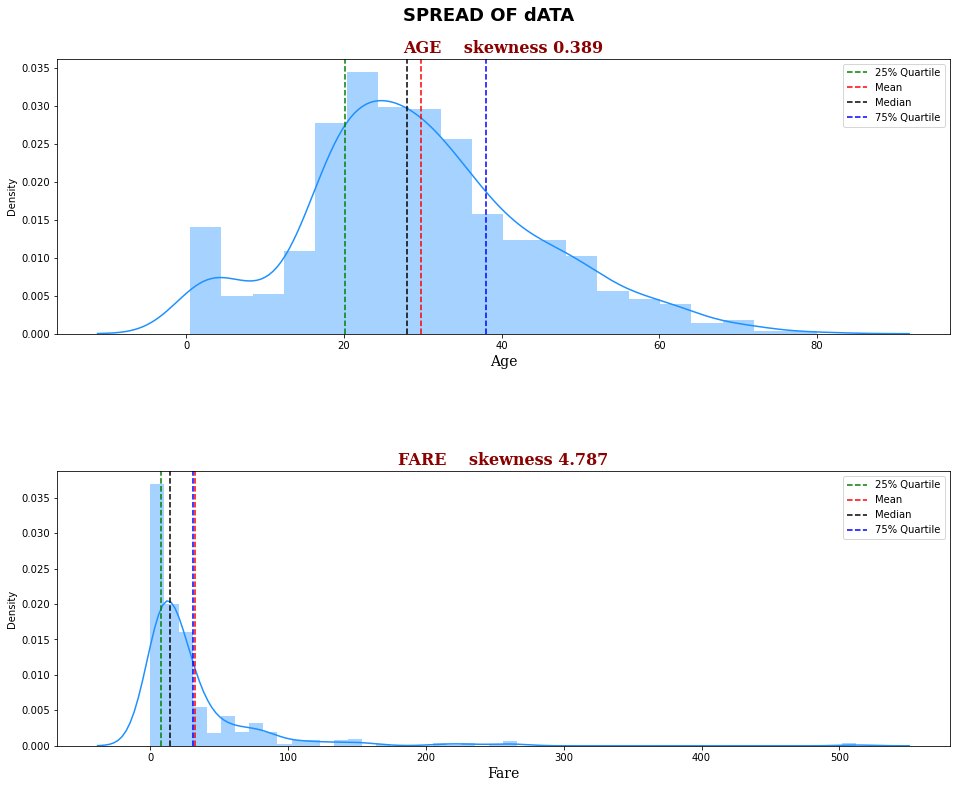

In [13]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax0 = fig.add_subplot(2, 1, i+1) 
    ax0 = sns.distplot(df[col],  color='dodgerblue')
    ax0.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax0.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax0.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax0.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax0.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax0.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax0.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax0.legend(fontsize=10)

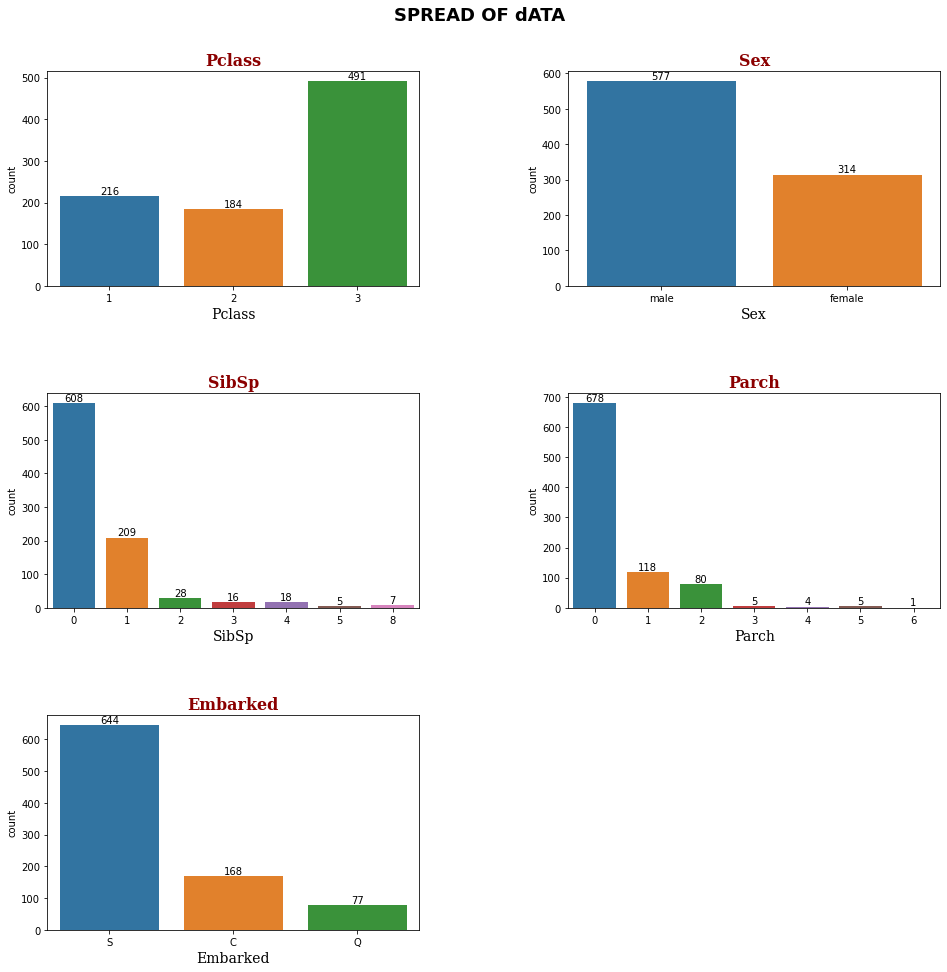

In [14]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,15])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
	a = fig.add_subplot(3,2, i+1)
	a=sns.countplot(x = df[col] , ax=a)
	a.bar_label(a.containers[0])
	a.set_title(col , fontdict=axtitle_dict)
	a.set_xlabel(col , fontdict=axlab_dict)

### Surviving Rate According to Gender

In [15]:
a = round(df.groupby('Sex').mean()['Survived'] ,2)
a = pd.DataFrame(a).T 
a 

Sex,female,male
Survived,0.74,0.19


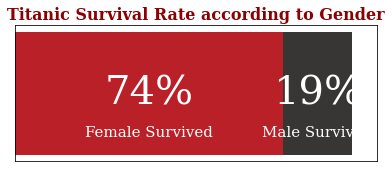

In [16]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))
ax.barh(a .index, a ['female'],color='#b20710', alpha=0.9, label='female')
ax.barh(a .index, a ['male'], left=a ['female'],color='#221f1f', alpha=0.9, label='male')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# /annotating code starts here
for i in a .index:
    ax.annotate(f'{int(a ["female"][i]*100)}%',   xy=(a ['female'][i]/2, i), va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',color='white')
    ax.annotate('Female Survived',   xy=(a ['female'][i]/2, -0.25),va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')        
for i in a .index:
	ax.annotate(f'{int(a ["male"][i]*100)}%' ,
                xy=(a ['female'][i]+a ['male'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
	ax.annotate('Male Survived' , xy=(a ['female'][i]+a ['male'][i]/2, -0.25),
                    va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                    color='white')
plt.title('Titanic Survival Rate according to Gender' , fontdict=axtitle_dict)
plt.show()


<p style='font-size:18px; font-family:'Calibri Light'; font-weight:bold;'>Observation:</p>
<p style='font-size:18px; font-family:'Calibri Light'; line-height:1.3'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Surviving Rate of female is 74% comparatively very high than male Surviving rate (19%).
Females Surviving Rate is almost three times than men.</p>

Surviving Rate of female is 74% comparatively very high than male Surviving rate.
Females Surviving Rate is almost three times than men.

In [17]:
emb_df = round((df.groupby('Embarked').mean()['Survived']*100),2).reset_index() 
emb_df

,Embarked,Survived
0,C,55.36
1,Q,38.96
2,S,33.70


[Text(0, 0, '55.36'), Text(0, 0, '38.96'), Text(0, 0, '33.7')]

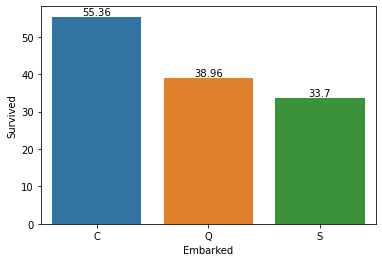

In [18]:
ax = sns.barplot(data = emb_df , x='Embarked' , y = 'Survived')
ax.bar_label(ax.containers[0])

<p style='font-size:18px; font-family:'Calibri Light'; font-weight:bold;'>Observation:</p>
<p style='font-size:18px; font-family:'Calibri Light'; line-height:1.3'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the above pie chart we can see passengers in Embarked C Survived More  compared to S and Q Embarked.</p>

In [19]:
pclass_df = round((df.groupby('Pclass').mean()['Survived']*100),2).reset_index() 
pclass_df


,Pclass,Survived
0,1,62.96
1,2,47.28
2,3,24.24


[Text(0, 0, '62.96'), Text(0, 0, '47.28'), Text(0, 0, '24.24')]

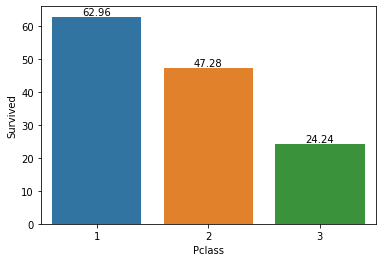

In [20]:
ax = sns.barplot(data = pclass_df , x='Pclass' , y = 'Survived')
ax.bar_label(ax.containers[0])

<p style='font-size:18px; font-family:'Calibri Light'; font-weight:bold;'>Observation:</p>
<p style='font-size:18px; font-family:'Calibri Light'; line-height:1.3'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Majority of the  Class 1 passengers Survived.Half of the class 2 passengers also survived.Only 24% Class 3 Passengers Survived.
It seems like if you have higher class probality of surviving is high</p>

## <font color ='brown'>Outliers</font> 

In [21]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
df_num = df[Num_cols]
df_num.describe()
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Age     True
Fare    True
dtype: bool

## <font color ='brown'>Visualization of outliers using box plot</font>  

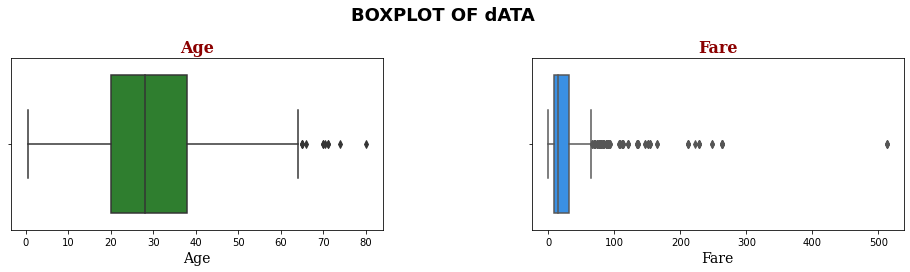

In [22]:

colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
	ax1 = fig.add_subplot(3, 2, i+1);
	ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
	ax1.set_title(f'{col}', fontdict=axtitle_dict) 
	ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

**Age and Fare has some outliers.**

**Finding the IQR For Budget columns**

In [23]:
dict = {}
for col in ['Age' ,'Fare']:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

**Counting upper limit and Lower limit**

In [24]:

for col in ['Age' ,'Fare']:
	print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
	print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which Age are less than lower limit.
There are total 11 Customers data which Age are more than upper limit.
There are total 0 Customers data which Fare are less than lower limit.
There are total 116 Customers data which Fare are more than upper limit.


**Capping Numcols with upper limit and lower limit.**

In [25]:
for col in ['Age' , 'Fare']:
	df[col] = np.where(df[col] > dict['upper_limit_' + col],dict['upper_limit_' + col],
np.where(df[col] < dict['lower_limit_' + col], dict['lower_limit_' + col],
df[col] ))

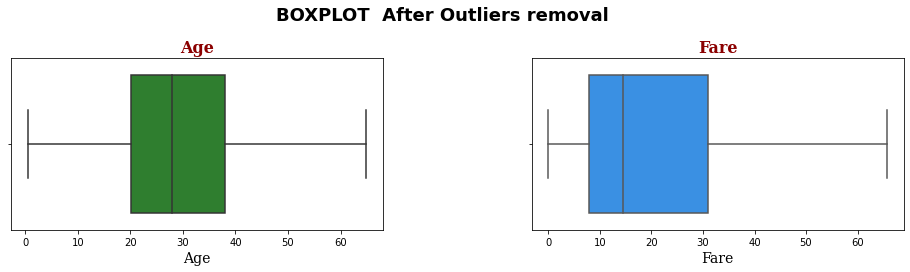

In [26]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT  After Outliers removal', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
	ax1 = fig.add_subplot(3, 2, i+1);
	ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
	ax1.set_title(f'{col}', fontdict=axtitle_dict) 
	ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

<p style='font-size:18px; font-family:'Calibri Light'; font-weight:bold;'>Observation:</p>
<p style='font-size:18px; font-family:'Calibri Light'; line-height:1.3'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Now you can see Outliers Removed.</p>

## <font color ='brown'>Bivariate analysis</font>

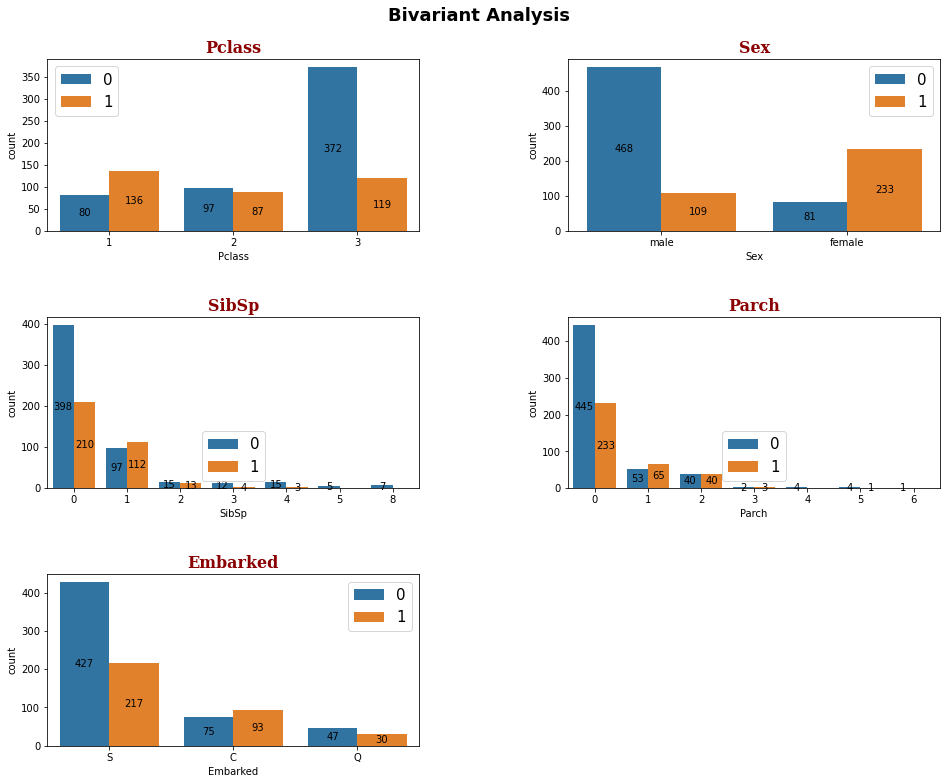

In [27]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 2, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['Survived'] )
    a.set_title(col , fontdict=axtitle_dict)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

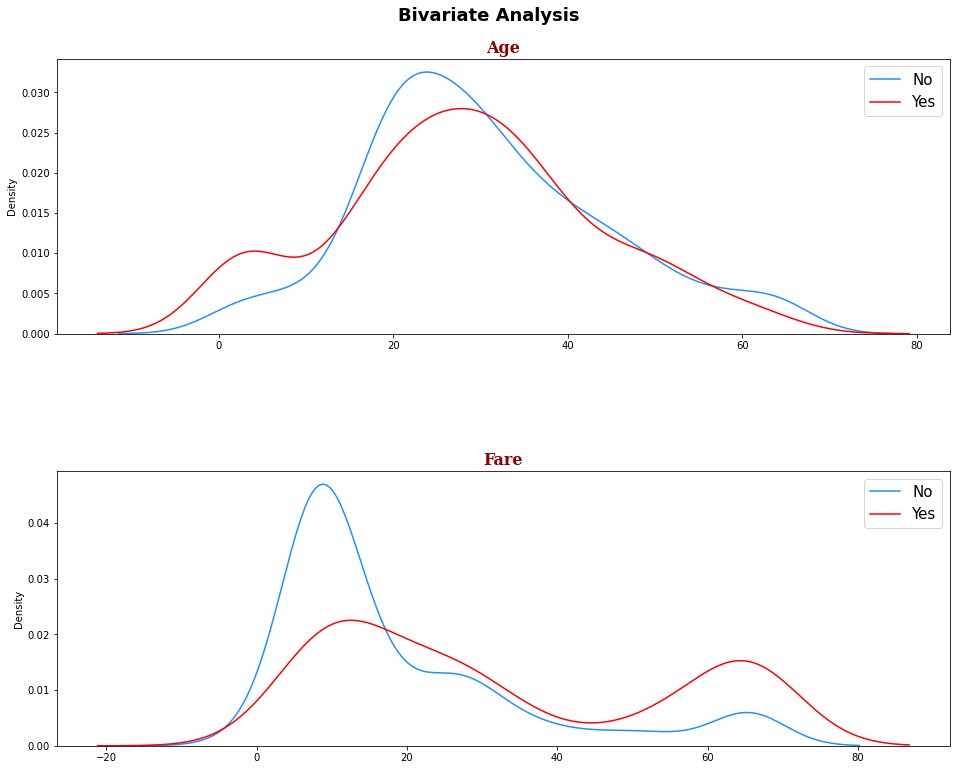

In [28]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(2,1 , i+1)
    
    sns.distplot(x =df[df['Survived']==0][col],  color='dodgerblue' , ax=a ,  hist =False )
    sns.distplot(x =df[df['Survived']==1][col],  color='red' , ax=a , hist =False ) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)


<p style='font-size:18px; font-family:'Calibri Light'; font-weight:bold;'>Observation:</p>
<p style='font-size:18px; font-family:'Calibri Light'; line-height:1.3'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Children and older have more chances of to survivial as compared to older individuals.</p>

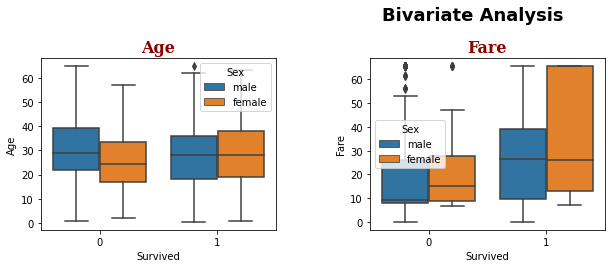

In [29]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'Survived' , y =col , ax=a  , data = df , hue = 'Sex' )
    a.set_title(col , fontdict=axtitle_dict)

In [30]:
df.drop(columns=['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis =1 ,inplace = True)

In [31]:
df['Age']      =df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [32]:
df.isna().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
df['Sex'] = df['Sex'].map({'male': 0,'female': 1}) 

In [34]:
dum_df = pd.get_dummies(df , columns =['Embarked'])
dum_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,65.6344,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


## <font color ='brown'> Feature Engineering </font>

In [35]:
dum_df['Family'] = np.where(dum_df['SibSp']+dum_df['Parch'] > 0 , 1 , 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,65.6344,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [36]:
dum_df.drop(columns=['SibSp' , 'Parch'] , axis=1 , inplace=True)

## <font color ='brown'>Correlation Analysis</font>


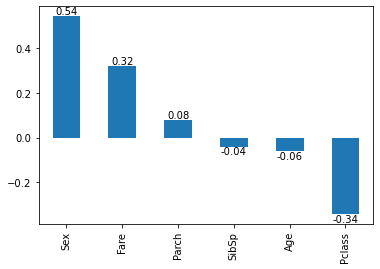

In [37]:
ax = round(df.corr()['Survived'][1:],2).sort_values(ascending = False).plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show() 

## <font color ='brown'>Heatmap</font>

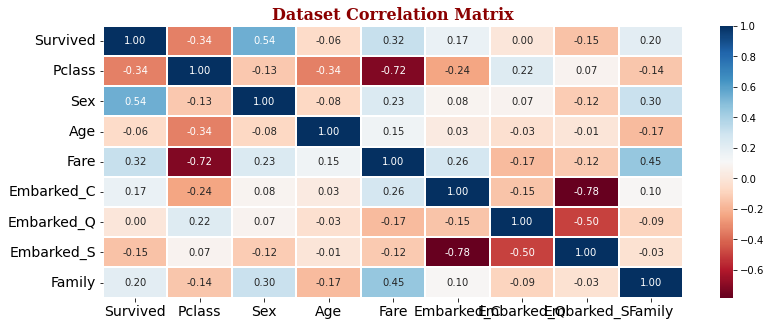

In [38]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(dum_df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

### Modelling 

In [39]:
X = dum_df.drop('Survived' , 1 )
y = dum_df['Survived']

In [40]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.33 , random_state = 42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((596, 8), (596,), (295, 8), (295,))

In [41]:
#Classificaiton Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score 
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier

**The models used include:**
- K Nearest Neighbors - fast, simple and instance-based
- Logistic Regression - fast and linear model
- Random Forest - slower but accurate ensemble model based on decision trees
- Support Vector Machines - slow

In [42]:
#Creating Model list
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 

**Model features**

In [43]:

def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):
	accuracy , precision , recall , f1_s = round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average='micro')  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3)
	print(f'Accuracy Score is :{accuracy}')
	print(f'Precision Score is :{precision}')
	print(f'Recall Score is :{recall}')
	print(f'f1  Score is :{f1_s}')
	model_list.append(model_name)
	accuracy_list.append(accuracy)
	recall_list.append(recall)
	precision_list.append(precision)
	f1_score_list.append(f1_s)
	print(metrics.classification_report(y_test, y_pred)) 

**Features Importances Weights**

In [44]:

# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
	weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )
	top_weights_selected = weights[:5]
	plt.figure(figsize=(7,6))
	plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
	plt.title(f'{classifier_name} - Top 5 Features')
	ax = top_weights_selected.plot(kind='bar')
	ax.bar_label(ax.containers[0])
	return print('')

**Confusion Matrix**

In [45]:
def confusion_matrix_plot(X_test , y_test , classifier ,classifier_name):
	ax = plot_confusion_matrix(classifier, X_test, y_test, display_labels=['label 1', 'label'], cmap=plt.cm.Blues, normalize='true')

In [46]:
##Logistic Regression
model_lr= LogisticRegression(random_state=0)  
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)
model_lr.score(X_test , y_test)

0.8

Accuracy Score is :0.8
Precision Score is :0.8
Recall Score is :0.733
f1  Score is :0.749
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       175
           1       0.77      0.73      0.75       120

    accuracy                           0.80       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295




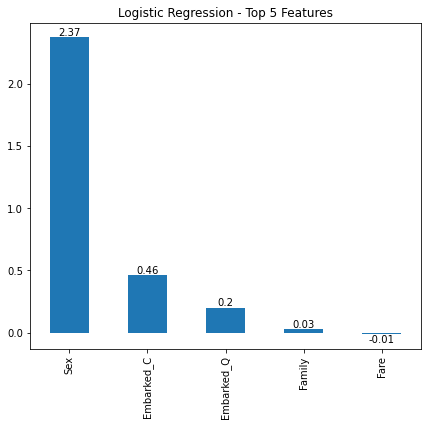

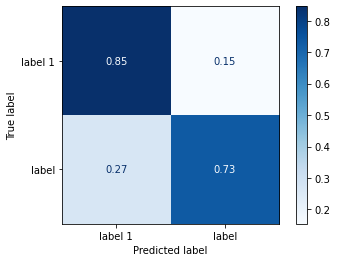

In [47]:
## Features analysis
Model_features(X_train , y_train , X_test , y_test  , y_pred , model_lr , 'Logistic Reegression') 
feature_weights(X_train , model_lr , 'Logistic Regression')
confusion_matrix_plot(X_test , y_test , model_lr ,  'Logistic Regression')

**RandomForest Classifier**

In [48]:
rf= RandomForestClassifier()  
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)
rf.score(X_test , y_test)

0.7593220338983051

Accuracy Score is :0.759
Precision Score is :0.759
Recall Score is :0.692
f1  Score is :0.7
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       175
           1       0.71      0.69      0.70       120

    accuracy                           0.76       295
   macro avg       0.75      0.75      0.75       295
weighted avg       0.76      0.76      0.76       295



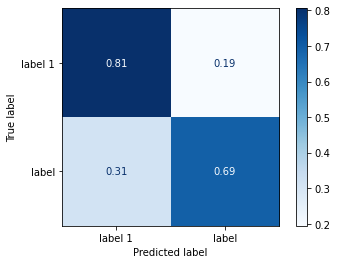

In [49]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , rf , 'RandomF') 
confusion_matrix_plot(X_test , y_test , rf ,  'RandomForest Classifier')

**Decision Tree Classifier**

In [50]:
dtc= DecisionTreeClassifier(random_state=0)  
dtc.fit(X_train, y_train) 
y_pred = dtc.predict(X_test)
dtc.score(X_test , y_test)

0.7288135593220338

Accuracy Score is :0.729
Precision Score is :0.729
Recall Score is :0.683
f1  Score is :0.672
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       175
           1       0.66      0.68      0.67       120

    accuracy                           0.73       295
   macro avg       0.72      0.72      0.72       295
weighted avg       0.73      0.73      0.73       295



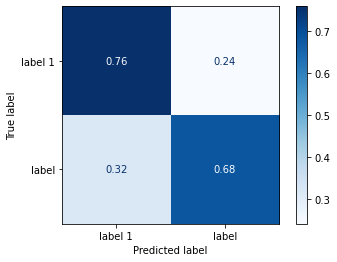

In [51]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , 'DecisionTree Classifier') 
confusion_matrix_plot(X_test , y_test , dtc ,  'DecisionTree Classifier')

In [52]:
##Support Vector Machines
svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred = svm.predict(X_test)
svm.score(X_test , y_test)

0.6779661016949152

Accuracy Score is :0.678
Precision Score is :0.678
Recall Score is :0.317
f1  Score is :0.444
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       175
           1       0.75      0.32      0.44       120

    accuracy                           0.68       295
   macro avg       0.70      0.62      0.61       295
weighted avg       0.70      0.68      0.64       295



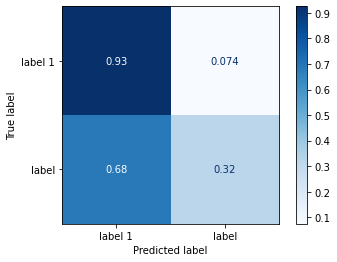

In [53]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , svm , 'Support Vector Machine')   
confusion_matrix_plot(X_test , y_test , svm , 'Support Vector Machine')


In [54]:
##Creatin Datafram
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 'f1_score':f1_score_list , 'Recall':recall_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df

,Model,Accuracy,Precision,f1_score,Recall
0,Logistic Reegression,0.800,0.800,0.749,0.733
1,RandomF,0.759,0.759,0.700,0.692
2,DecisionTree Classifier,0.729,0.729,0.672,0.683
3,Support Vector Machine,0.678,0.678,0.444,0.317


<p style='font-size:18px; font-family:'Calibri Light'; font-weight:bold;'>LogisticRegression is best model for this problem with accuracy 80 Percentage.:</p>
